1. sp.search name of song
2. play song with id
3. audiofeatures of the song
4. scale the new song
5. user function
6. -> song -> id -> features -> scaler.transform -> kmeans.predict (cluster for the song) -> random song from same cluster!

In [13]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

hot_df = pd.read_csv("hot100_billboard.csv")

In [14]:
df_for_scaling = hot_df.drop(["id", "duration_ms"], axis=1)
df_for_scaling

danceability  energy  loudness  speechiness  acousticness  \
0            0.423   0.685    -9.651       0.0780      0.000063   
1            0.324   0.991    -4.465       0.1970      0.002470   
2            0.308   0.866    -5.671       0.0590      0.000739   
3            0.453   0.905    -4.001       0.1150      0.360000   
4            0.420   0.930    -5.583       0.0638      0.018900   
...            ...     ...       ...          ...           ...   
2171         0.855   0.954    -1.190       0.2640      0.529000   
2172         0.520   0.761    -3.093       0.0853      0.256000   
2173         0.188   0.411    -9.733       0.0484      0.174000   
2174         0.647   0.822    -4.662       0.1830      0.219000   
2175         0.601   0.794    -5.844       0.0671      0.009870   

      instrumentalness  liveness  valence    tempo  
0             0.006420    0.1330    0.328  162.780  
1             0.008950    0.1040    0.195  140.245  
2             0.001410    0.2320    0.227  109.825  
3             0.000569    0.2600    0.474  137.571  
4             0.006750    0.2640    0.344   99.641  
...                ...       ...      ...      ...  
2171          0.000000    0.2050    0.668  114.635  
2172          0.000005    0.1700    0.286  141.971  
2173          0.153000    0.0843    0.159  187.376  
2174          0.000000    0.0908    0.962  160.019  
2175          0.000001    0.3880    0.244  114.066  

[2176 rows x 9 columns]

In [15]:
# scaling
scaler = StandardScaler()
scaler.fit(df_for_scaling)
X_scaled = scaler.transform(df_for_scaling)
X_scaled_df = pd.DataFrame(X_scaled, columns = df_for_scaling.columns)
display(df_for_scaling.head())
print()
display(X_scaled_df.head())

danceability  energy  loudness  speechiness  acousticness  \
0         0.423   0.685    -9.651       0.0780      0.000063   
1         0.324   0.991    -4.465       0.1970      0.002470   
2         0.308   0.866    -5.671       0.0590      0.000739   
3         0.453   0.905    -4.001       0.1150      0.360000   
4         0.420   0.930    -5.583       0.0638      0.018900   

   instrumentalness  liveness  valence    tempo  
0          0.006420     0.133    0.328  162.780  
1          0.008950     0.104    0.195  140.245  
2          0.001410     0.232    0.227  109.825  
3          0.000569     0.260    0.474  137.571  
4          0.006750     0.264    0.344   99.641

danceability    energy  loudness  speechiness  acousticness  \
0     -1.253694  0.235976 -0.312903     0.149841     -0.910906   
1     -1.910835  1.533154  0.900261     1.998916     -0.903224   
2     -2.017039  1.003261  0.618140    -0.145389     -0.908748   
3     -1.054560  1.168588  1.008805     0.724763      0.237743   
4     -1.273607  1.274566  0.638726    -0.070805     -0.850791   

   instrumentalness  liveness   valence     tempo  
0         -0.331170 -0.303131 -0.962783  1.657619  
1         -0.318697 -0.503481 -1.498680  0.798926  
2         -0.355871  0.380822 -1.369742 -0.360224  
3         -0.360017  0.574263 -0.374504  0.697033  
4         -0.329543  0.601898 -0.898314 -0.748284

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

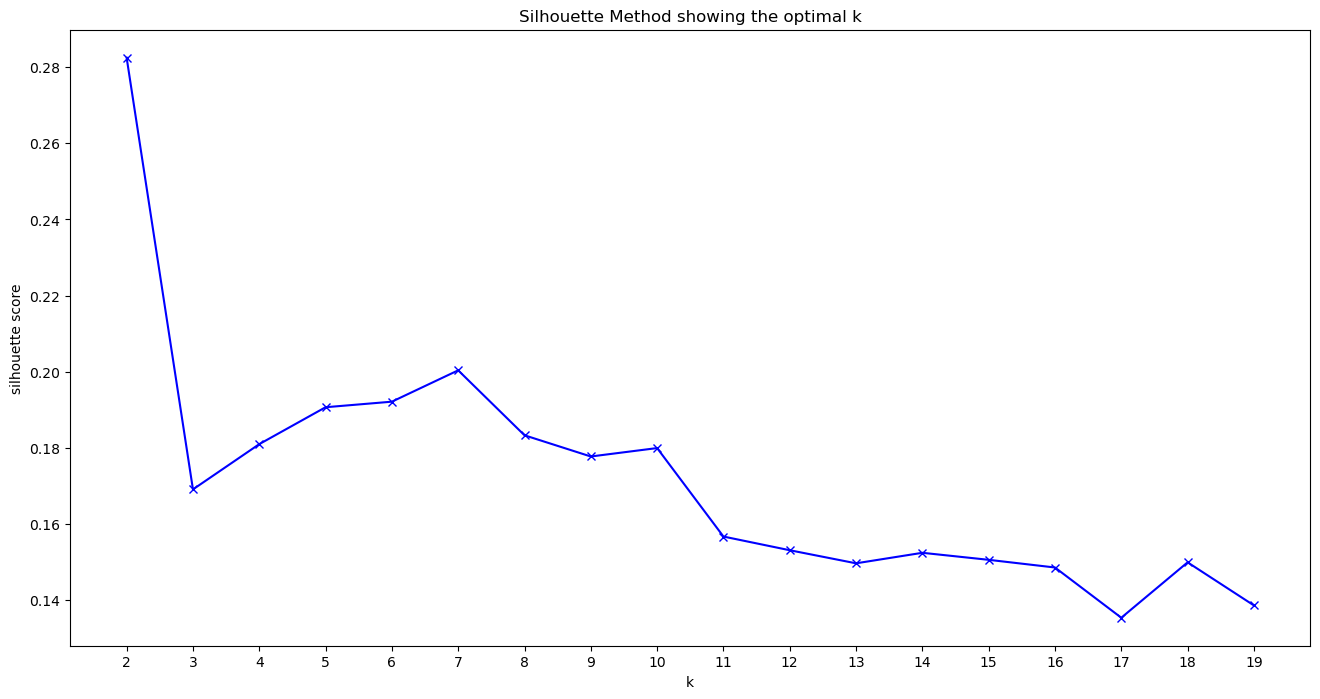

In [17]:
# Kmeans fitting: Silohuette
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

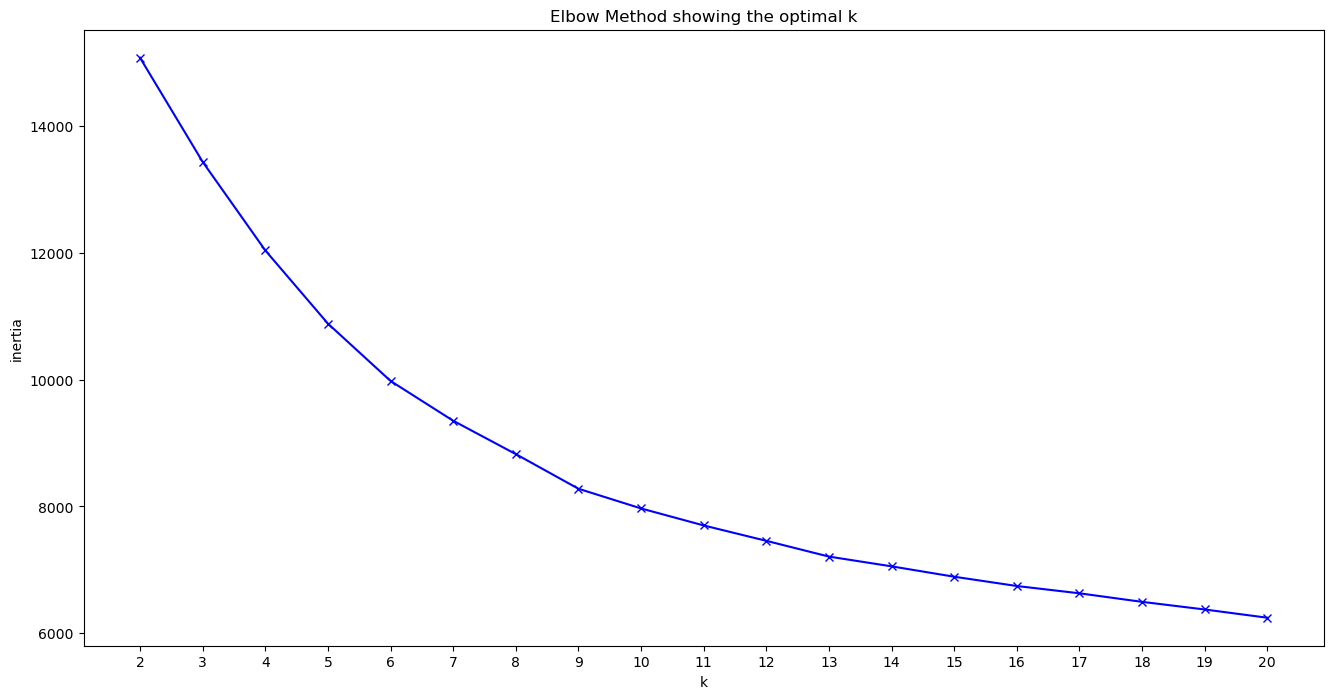

In [18]:
#Kmeans fitting: Elbow
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [19]:
#Clustering
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [20]:
kmeans.labels_

array([6, 6, 6, ..., 6, 3, 4], dtype=int32)

In [21]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    401
1    776
2     88
3    121
4    220
5     71
6    499
dtype: int64

In [24]:
#Creating a column of clusters corresponding to each song
#X_df = pd.DataFrame(X)
hot_df["cluster"] = clusters
hot_df

danceability  energy  loudness  speechiness  acousticness  \
0            0.423   0.685    -9.651       0.0780      0.000063   
1            0.324   0.991    -4.465       0.1970      0.002470   
2            0.308   0.866    -5.671       0.0590      0.000739   
3            0.453   0.905    -4.001       0.1150      0.360000   
4            0.420   0.930    -5.583       0.0638      0.018900   
...            ...     ...       ...          ...           ...   
2171         0.855   0.954    -1.190       0.2640      0.529000   
2172         0.520   0.761    -3.093       0.0853      0.256000   
2173         0.188   0.411    -9.733       0.0484      0.174000   
2174         0.647   0.822    -4.662       0.1830      0.219000   
2175         0.601   0.794    -5.844       0.0671      0.009870   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.006420    0.1330    0.328  162.780  3q9G9SvgdfE1fxlvoDIb20   
1             0.008950    0.1040    0.195  140.245  47FyQCd3TYLrZ9TU6MPaWK   
2             0.001410    0.2320    0.227  109.825  6p8eFfPw3nQkf37aT3AkmK   
3             0.000569    0.2600    0.474  137.571  2b9lp5A6CqSzwOrBfAFhof   
4             0.006750    0.2640    0.344   99.641  1s4Ie0cT6P73SRSfh3oyGW   
...                ...       ...      ...      ...                     ...   
2171          0.000000    0.2050    0.668  114.635  7Ie9W94M7OjPoZVV216Xus   
2172          0.000005    0.1700    0.286  141.971  7vGuf3Y35N4wmASOKLUVVU   
2173          0.153000    0.0843    0.159  187.376  0NlGoUyOJSuSHmngoibVAs   
2174          0.000000    0.0908    0.962  160.019  60nZcImufyMA1MKQY3dcCH   
2175          0.000001    0.3880    0.244  114.066  27rdGxbavYJeBphck5MZAF   

      duration_ms  cluster  
0          167720        6  
1          166707        6  
2          438120        6  
3          296200        6  
4          291373        6  
...           ...      ...  
2171       248133        3  
2172       180823        6  
2173       305747        6  
2174       232720        3  
2175       217467        4  

[2176 rows x 12 columns]